In [1]:
import nsfg
import thinkplot
import thinkstats2
import numpy as np
import matplotlib.pyplot as plt
import mystats
%matplotlib inline

Read live birth data from NSFG data

In [2]:
#using default dataset 2002FemPreg.dat
preg = nsfg.ReadFemPreg() 
live = preg[preg.outcome==1]

Generate and plot the histogram of birthwgt_lb for live births.

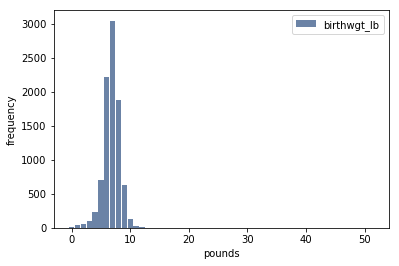

In [3]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

The above figure shows the distribution of pounds of live births. It was found that the most common value, mode, is 7 pounds. The distribution is approximately bell-shaped, implying it is normally distributed. However, it is not a true normal distribution, as the distribution is asymmetric, which has a tail extending father to the left than to the right.

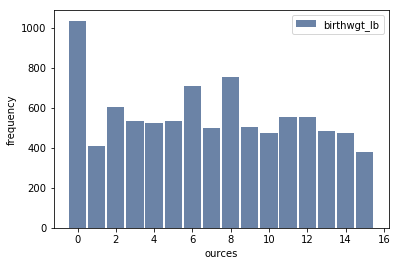

In [4]:
hist = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.show(xlabel='ources', ylabel='frequency')

The above figure shows the distribution of the reported ources of live birhts. We expect that the distribution is uniform. However, 0 is more common than the other values, while 1 and 15 are less common. Probably becuase respondents round off birth weights that are close to an integer value.

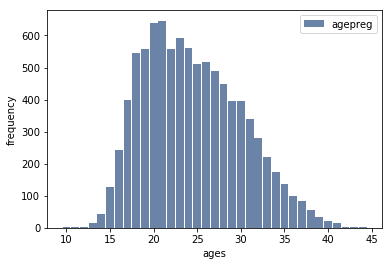

In [5]:
hist = thinkstats2.Hist(np.floor(live.agepreg), label='agepreg')
thinkplot.Hist(hist)
thinkplot.show(xlabel='ages', ylabel='frequency')

The figure shows the histogram of the mother's age at the end of pregnancy. The mode is 21 years. The distribution has the tail extending father to the right than left. Most mothers are in their 20s.

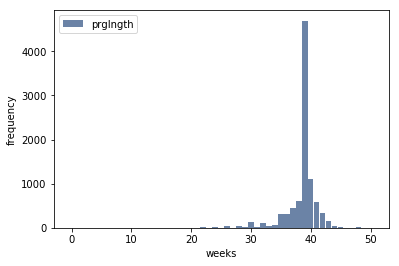

In [6]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.show(xlabel='weeks', ylabel='frequency')

The figure shows the histogram of the pregnant length in weeks. The most common value is 39 weeks. The left tail is longer than the right, revealing early babies are common.Pregnancies seldom go past 43 weeks, as doctors often intervene if they do

Before going further, we need to check for outliers, which are extreme value that might be errors in measurement and recording, or might be accurate reports of rare events

In [7]:
for weeks, freq in hist.Smallest(10): #return 10 smallest values and their frequencies
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


The values below 10 weeks are certainly errors. The most likely explannations is that the outcome was not coded correctly. Values higher than 30 weeks are probably legitimate. The value between 10 and 30 weeks are hard to be sure.

In [8]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


50 weeks seems medically unlikely

When people ask whether first babies tend to be early/late, they usually interested in full-term pregnanacies. So, for this analysis, I will focus on pregnancies longer than 27 weeks.

In [9]:
# Divide the data into first babies and the others
live_ft = live[live.prglngth>=26]
live_ft = live_ft[live_ft.prglngth<=46]
firsts = live_ft[live_ft.birthord==1]
others = live_ft[live_ft.birthord!=1]

In [10]:
first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='others')

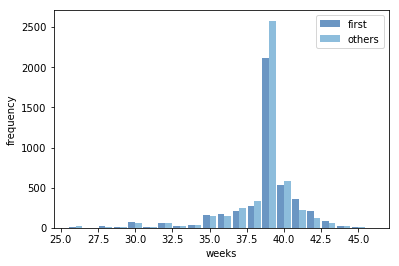

In [11]:
width=0.45 # set the width of the bars
thinkplot.preplot(2) # take the number of histgrams we are planning to plot
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency')

In [12]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
print('mean: ', mean, '\nvariance: ', var, '\nstandard deviation: ', std)

mean:  38.56055968517709 
variance:  7.302662067826851 
standard deviation:  2.702343810070593


In [13]:
print(mystats.CohenEffectSize(firsts.prglngth, others.prglngth))

0.029609847483183717


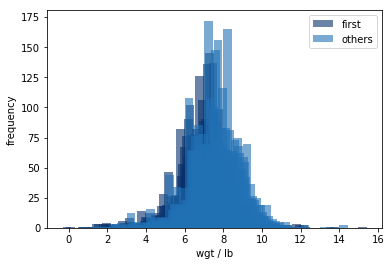

In [27]:
bins = range(0, 16)
first_wgt = thinkstats2.Hist(firsts[firsts.totalwgt_lb<50].totalwgt_lb, label='first')
others_wgt = thinkstats2.Hist(others[others.totalwgt_lb<50].totalwgt_lb, label='others')
thinkplot.Hist(first_wgt, align='right', width=0.45)
thinkplot.Hist(others_wgt, align='left', width=0.45)
thinkplot.Show(xlabel='wgt / lb', ylabel='frequency')

In [29]:
first_wgt = firsts[firsts.totalwgt_lb<50].totalwgt_lb.mean()
others_wgt = others[others.totalwgt_lb<50].totalwgt_lb.mean()
cohen = mystats.CohenEffectSize(firsts[firsts.totalwgt_lb<50].totalwgt_lb, others[others.totalwgt_lb<50].totalwgt_lb)
print(first_wgt, others_wgt, cohen)

7.2184837669813495 7.341472264029241 -0.08934479639114119
